In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/custom-novartis-oncology-hackathon-2020/merged_px_rx_outer.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/PX.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/all_data_grouped2.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/DIAG_2l.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/problem_2_grouped_data.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/PX_2l.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/RX.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/PROCEDURE_reference_20200925.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/RX_2l.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/PRODUCT_reference_20200925.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/all_data_proc_abbr.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/problem_1_grouped_data.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/all_data_new.txt
/kaggle/input/custom-novartis-oncology-hackathon-

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("/kaggle/input/custom-novartis-oncology-hackathon-2020/problem_2_grouped_data.txt", compression='gzip', sep='|')

In [4]:
# train2 = pd.read_csv("/kaggle/input/custom-novartis-oncology-hackathon-2020/all_data_grouped2.txt",compression='gzip',sep='|')

In [5]:
train.head()

,PATIENT_ID,PROVIDER_BILLING_ID,PROVIDER_FACILITY_ID,PROVIDER_REFERRING_ID,PROVIDER_RENDERING_ID,PAYER_PLAN_ID,PROVIDER_ID,BOOL_FLEXIBLE_FLD,WEEK_ID,BOOL_PROC_MOD,...,BRAND_VER,BRAND_nan,DRUG_CLASS_AI,DRUG_CLASS_AM,DRUG_CLASS_KI,DRUG_CLASS_OTHERS,DRUG_CLASS_SERD,DRUG_CLASS_SERM,DRUG_CLASS_nan,TREATMENT_CHANGE
0,29360529,3,1,2,5,5,1,22,11,4,...,0,40.0,1,0,0,0.0,0.0,6,40.0,1
1,29425424,16,1,14,27,6,3,443,76,58,...,0,450.0,18,0,1,0.0,0.0,0,450.0,1
2,29494927,4,1,4,8,8,3,361,160,58,...,0,123.0,3,0,0,382.0,0.0,0,123.0,0
3,29531186,5,1,8,38,10,1,1538,60,316,...,0,1289.0,3,0,0,291.0,0.0,0,1289.0,0
4,29537719,3,1,6,7,5,2,42,31,9,...,0,37.0,18,0,0,2.0,3.0,0,37.0,1


In [6]:
# train.info(verbose=True, null_counts=True)

In [7]:
train.describe()

,PATIENT_ID,PROVIDER_BILLING_ID,PROVIDER_FACILITY_ID,PROVIDER_REFERRING_ID,PROVIDER_RENDERING_ID,PAYER_PLAN_ID,PROVIDER_ID,BOOL_FLEXIBLE_FLD,WEEK_ID,BOOL_PROC_MOD,...,BRAND_VER,BRAND_nan,DRUG_CLASS_AI,DRUG_CLASS_AM,DRUG_CLASS_KI,DRUG_CLASS_OTHERS,DRUG_CLASS_SERD,DRUG_CLASS_SERM,DRUG_CLASS_nan,TREATMENT_CHANGE
count,1.996200e+04,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000,...,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000,19962.000000
mean,7.999345e+08,5.294610,1.061968,5.563471,12.685252,4.505160,2.857179,379.744515,45.735097,70.987677,...,0.100541,345.812043,8.783439,0.387085,0.492185,51.051598,1.566827,2.669472,345.812043,0.473550
std,5.041639e+08,4.089147,0.715343,4.250510,10.423836,2.561248,2.101262,471.729496,32.090731,127.990305,...,1.071541,431.705120,12.003767,3.304905,2.231720,114.904830,10.846353,7.612810,431.705120,0.499312
min,2.936053e+07,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.509969e+08,2.000000,1.000000,3.000000,5.000000,3.000000,1.000000,45.000000,22.000000,7.000000,...,0.000000,49.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,49.000000,0.000000
50%,7.404408e+08,5.000000,1.000000,5.000000,11.000000,4.000000,2.000000,253.000000,41.000000,37.000000,...,0.000000,233.000000,4.000000,0.000000,0.000000,6.000000,0.000000,0.000000,233.000000,0.000000
75%,1.202524e+09,8.000000,1.000000,8.000000,18.000000,6.000000,4.000000,557.000000,62.000000,86.000000,...,0.000000,485.000000,13.000000,0.000000,0.000000,49.000000,0.000000,1.000000,485.000000,1.000000
max,5.236974e+09,35.000000,6.000000,44.000000,155.000000,28.000000,31.000000,7879.000000,293.000000,4537.000000,...,42.000000,7964.000000,95.000000,110.000000,43.000000,3765.000000,269.000000,77.000000,7964.000000,1.000000


In [8]:
target='TREATMENT_CHANGE'
indexes = ['PATIENT_ID']
categorical_columns = ['BOOL_FLEXIBLE_FLD', 'BOOL_PROC_MOD']
numeric_columns = list(train.columns)
numeric_columns.remove('PATIENT_ID')
numeric_columns.remove(target)
numeric_columns.remove(categorical_columns[0])
numeric_columns.remove(categorical_columns[1])

In [9]:
all_cols = numeric_columns + categorical_columns

In [10]:
def convert_type(df):
    for column in categorical_columns:
        df[column] = df[column].astype('category')
        
#     for col in date_columns: 
#         df[col] = pd.to_datetime(df[col]) 
#         df[col] = df[col].apply(pd.datetime.toordinal)

In [11]:
convert_type(train)

In [12]:
# train_rows_all = set(train[indexes])

In [13]:
train.drop(target,axis=1).shape

(19962, 116)

In [14]:
train.shape

(19962, 117)

In [15]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for i in categorical_columns:
#     df_total[i]=le.fit_transform(df_total[i])

# le = LabelEncoder()
# for i in boolean_columns:
#     df_total[i] = le.fit_transform(df_total[i])

## Binary categories

In [16]:
# import category_encoders as ce

# ce_bin=ce.BinaryEncoder(cols=categorical_columns)
# df_total_binary = ce_bin.fit_transform(df_total)

## Split Train and test

In [17]:
X= train[all_cols]
y= train[[target]]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
print(train[train[target] == 1].shape)
print(train[train[target] == 0].shape)

(9453, 117)
(10509, 117)


In [20]:
print(y_train[y_train[target] == 1].shape)
print(y_train[y_train[target] == 0].shape)

(7120, 1)
(7851, 1)


In [21]:
temp_train = pd.concat([X_train,y_train],axis=1)

In [22]:
print(temp_train[temp_train[target] == 1].shape)
print(temp_train[temp_train[target] == 0].shape)

(7120, 116)
(7851, 116)


In [23]:
temp_train.shape

(14971, 116)

## Down Sampling

### Since both the categories are in equal amounts we dont need sampling

In [24]:
# from sklearn.utils import resample

# #separating majority and minority classes
# df_majority = temp_train[temp_train[target] == 0]
# df_minority = temp_train[temp_train[target] == 1]

# df_majority_downsampled = resample(df_majority,
#                                    replace=False,
#                                    n_samples=3018,
#                                    random_state=42)

# df_downsampled = pd.concat([df_minority,df_majority_downsampled],axis=0)

# #splitting dependent and independent variables

# df_downsampled_X = df_downsampled[numeric_columns]
# df_downsampled_Y = df_downsampled[[target]]

# print(df_downsampled_X.shape)
# print(df_downsampled_Y.shape)

In [25]:
# df_downsampled.head()

## Up Sampling

In [26]:
# # from sklearn.utils import resample

# #separating majority and minority classes
# df_majority = temp_train[temp_train[target] == 0]
# df_minority = temp_train[temp_train[target] == 1]

# df_minority_upsampled = resample(df_minority,
#                                    replace=True,
#                                    n_samples=11982,
#                                    random_state=42)

# df_upsampled = pd.concat([df_majority,df_minority_upsampled],axis=0)

# #splitting dependent and independent variables

# df_upsampled_X = df_upsampled[numeric_columns]
# df_upsampled_Y = df_upsampled[[target]]

# print(df_upsampled_X.shape)
# print(df_upsampled_Y.shape)

In [27]:
# df_upsampled.head(2)

In [28]:
# from sklearn.model_selection import train_test_split

# X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(df_upsampled_X, df_upsampled_Y, test_size=0.25, random_state=42)
# X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(df_downsampled_X, df_downsampled_Y, test_size=0.25, random_state=42)

In [29]:
# features_train_up=np.array(df_upsampled_X[numeric_columns])
# target_train_up=np.array(df_upsampled_Y[target])

# features_train_down=np.array(df_downsampled_X[numeric_columns])
# target_train_down=np.array(df_downsampled_Y[target])
# # actual_test=np.array(test[numeric_columns])

## feature Scaling

In [30]:
# features_train_up[0]

In [31]:
# #feature scaling
# from sklearn.preprocessing import MinMaxScaler,PowerTransformer,StandardScaler
# # scaler = MinMaxScaler()

# scaler = StandardScaler()

# features_train_up_scaled = scaler.fit_transform(features_train_up)
# features_train_down_scaled = scaler.fit_transform(features_train_down)
# # features_actual = scaler.transform(actual_test)

In [32]:
# def make_submission(prediction, sub_name):
#     my_submission = pd.DataFrame({'PATIENT_ID':X_test['PATIENT_ID'],'MBC_PATIENT':prediction})
#     my_submission.to_csv('{}.csv'.format(sub_name),index=False)
#     print('A submission file has been made')

## CatBoost

In [33]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier(learning_rate=0.15, n_estimators=500, subsample=0.70, max_depth=5, scale_pos_weight=2.5)


In [34]:
# CBC.fit(X_train_up[numeric_columns],y_train_up[target])
# CBC_predict_up = CBC.predict(X_test_up[numeric_columns])

In [35]:
# CBC.fit(X_train_down[numeric_columns],y_train_down[target])
# CBC_predict_down = CBC.predict(X_test_down[numeric_columns])


In [36]:
CBC.fit(X_train[all_cols],y_train[target],cat_features=categorical_columns)
CBC_predict = CBC.predict(X_test[all_cols])

0:	learn: 0.4534800	total: 101ms	remaining: 50.3s
1:	learn: 0.3693085	total: 130ms	remaining: 32.4s
2:	learn: 0.2325126	total: 156ms	remaining: 25.9s
3:	learn: 0.1846156	total: 185ms	remaining: 22.9s
4:	learn: 0.1635014	total: 208ms	remaining: 20.6s
5:	learn: 0.1361549	total: 237ms	remaining: 19.5s
6:	learn: 0.1295094	total: 262ms	remaining: 18.4s
7:	learn: 0.1203401	total: 289ms	remaining: 17.8s
8:	learn: 0.1139749	total: 318ms	remaining: 17.4s
9:	learn: 0.1101891	total: 345ms	remaining: 16.9s
10:	learn: 0.1076260	total: 371ms	remaining: 16.5s
11:	learn: 0.1059994	total: 399ms	remaining: 16.2s
12:	learn: 0.0996154	total: 425ms	remaining: 15.9s
13:	learn: 0.0975437	total: 451ms	remaining: 15.7s
14:	learn: 0.0947755	total: 477ms	remaining: 15.4s
15:	learn: 0.0899174	total: 503ms	remaining: 15.2s
16:	learn: 0.0870072	total: 533ms	remaining: 15.1s
17:	learn: 0.0843065	total: 558ms	remaining: 15s
18:	learn: 0.0762476	total: 584ms	remaining: 14.8s
19:	learn: 0.0747168	total: 611ms	remaining

In [37]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [38]:
# accuracy_score(CBC_predict_down,y_test_down)

In [39]:
# accuracy_score(CBC_predict_up,y_test_up)

In [40]:
from sklearn.metrics import confusion_matrix
CBC_CM = confusion_matrix(y_test, CBC_predict)
print("Accuracy:",accuracy_score(CBC_predict,y_test))
print("Precision:",precision_score(CBC_predict,y_test))
print("Recall/Sevsitivity:",recall_score(CBC_predict,y_test))
CBC_specificity = CBC_CM[0][0]/(CBC_CM[0][0]+CBC_CM[0][1])
print("Specificity:",CBC_specificity)

Accuracy: 0.971749148467241
Precision: 0.9837119588512645
Recall/Sevsitivity: 0.9570475396163469
Specificity: 0.9612490594431904


In [41]:

# make_submission(CBC_predict_dummy_down,"CBC_predict_dummy_down")
# make_submission(CBC_predict_dummy_up,"CBC_predict_dummy_up")
# make_submission(CBC_predict_binary_down,"CBC_predict_binary_down")
# make_submission(CBC_predict_binary_up,"CBC_predict_binary_up")


# Model Training

In [42]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix

# Submission File

In [43]:
train_cols = all_cols

In [44]:
# df_upsampled_X[train_cols]

In [45]:

#Logistic Regression

LR = LogisticRegression()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train[train_cols], y_train[target], scoring=scoring, cv=20)
sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR.fit(X_train[train_cols],y_train[target])
LR_predict = LR.predict(X_test[train_cols])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [46]:
LR_accuracy

0.6704261653684414

In [47]:
#Logistic Regression

LR = LogisticRegression()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR.fit(X_train[train_cols],y_train[target])
LR_predict = LR.predict(X_test[train_cols])
LR_CM = confusion_matrix(y_test, LR_predict)
LR_specificity = LR_CM[0][0]/(LR_CM[0][0]+LR_CM[0][1])


#Decision Tree

decision_tree = DecisionTreeClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()
decision_tree.fit(X_train[train_cols],y_train[target])
dtree_predict = decision_tree.predict(X_test[train_cols])
dtree_CM = confusion_matrix(y_test, dtree_predict)
dtree_specificity = dtree_CM[0][0]/(dtree_CM[0][0]+dtree_CM[0][1])


#Support Vector Machine

#SVM = SVC(probability = True)
#scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
#scores = cross_validate(SVM, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
#sorted(scores.keys())
#SVM_fit_time = scores['fit_time'].mean()
#SVM_score_time = scores['score_time'].mean()
#SVM_accuracy = scores['test_accuracy'].mean()
#SVM_precision = scores['test_precision_macro'].mean()
#SVM_recall = scores['test_recall_macro'].mean()
#SVM_f1 = scores['test_f1_weighted'].mean()
#SVM_roc = scores['test_roc_auc'].mean()
#SVM.fit(X_train[train_cols],y_train[target])
#SVM_predict = SVM.predict(X_test[train_cols])
#SVM_CM = confusion_matrix(y_test, SVM_predict)
#SVM_specificity = SVM_CM[0][0]/(SVM_CM[0][0]+SVM_CM[0][1])

#Linear Discriminant Analysis

LDA = LinearDiscriminantAnalysis()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()
LDA.fit(X_train[train_cols],y_train[target])
LDA_predict = LDA.predict(X_test[train_cols])
LDA_CM = confusion_matrix(y_test, LDA_predict)
LDA_specificity = LDA_CM[0][0]/(LDA_CM[0][0]+LDA_CM[0][1])

#Quadratic Discriminant Analysis

QDA = QuadraticDiscriminantAnalysis()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()
QDA.fit(X_train[train_cols],y_train[target])
QDA_predict = QDA.predict(X_test[train_cols])
QDA_CM = confusion_matrix(y_test, QDA_predict)
QDA_specificity = QDA_CM[0][0]/(QDA_CM[0][0]+QDA_CM[0][1])

#Random Forest Classifier

random_forest = RandomForestClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()
random_forest.fit(X_train[train_cols],y_train[target])
forest_predict = random_forest.predict(X_test[train_cols])
forest_CM = confusion_matrix(y_test, forest_predict)
forest_specificity = forest_CM[0][0]/(forest_CM[0][0]+forest_CM[0][1])

#K-Nearest Neighbors

KNN = KNeighborsClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()
KNN.fit(X_train[train_cols],y_train[target])
KNN_predict = KNN.predict(X_test[train_cols])
KNN_CM = confusion_matrix(y_test, KNN_predict)
KNN_specificity = KNN_CM[0][0]/(KNN_CM[0][0]+KNN_CM[0][1])

#Naive Bayes

scoring
bayes = GaussianNB()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()
bayes.fit(X_train[train_cols],y_train[target])
bayes_predict = bayes.predict(X_test[train_cols])
bayes_CM = confusion_matrix(y_test, bayes_predict)
bayes_specificity = bayes_CM[0][0]/(bayes_CM[0][0]+bayes_CM[0][1])


## Comparison

models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall/Sensitivity' : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'Specificity' : [LR_specificity, dtree_specificity, LDA_specificity, QDA_specificity, forest_specificity, KNN_specificity, bayes_specificity],
    'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specificity', 'F1_score', 'AUC_ROC'])
models_tree.sort_values(by='Accuracy', ascending=False)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Model,Fitting time,Scoring time,Accuracy,Precision,Recall/Sensitivity,Specificity,F1_score,AUC_ROC
1,Decision Tree,0.439348,0.105262,0.961859,0.961856,0.961693,0.962002,0.961856,0.962391
4,Random Forest,3.946086,0.249337,0.954979,0.954749,0.955715,0.945824,0.955003,0.989667
2,Linear Discriminant Analysis,0.454104,0.108361,0.688999,0.688904,0.689242,0.680963,0.689138,0.736073
5,K-Nearest Neighbors,0.414548,3.129230,0.678512,0.678210,0.675929,0.737773,0.677464,0.720021
0,Logistic Regression,0.521568,0.107575,0.669026,0.669043,0.669252,0.647479,0.669127,0.728146
6,Bayes,0.221773,0.113127,0.582593,0.613367,0.593087,0.398044,0.562974,0.655229
3,Quadratic Discriminant Analysis,0.276116,0.118614,0.540978,0.582248,0.541007,0.895786,0.457329,0.642296


In [48]:
models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall/Sensitivity' : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'Specificity' : [LR_specificity, dtree_specificity, LDA_specificity, QDA_specificity, forest_specificity, KNN_specificity, bayes_specificity],
    'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specificity', 'F1_score', 'AUC_ROC'])
models_tree.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall/Sensitivity,Specificity,F1_score,AUC_ROC
1,Decision Tree,0.439348,0.105262,0.961859,0.961856,0.961693,0.962002,0.961856,0.962391
4,Random Forest,3.946086,0.249337,0.954979,0.954749,0.955715,0.945824,0.955003,0.989667
2,Linear Discriminant Analysis,0.454104,0.108361,0.688999,0.688904,0.689242,0.680963,0.689138,0.736073
5,K-Nearest Neighbors,0.414548,3.129230,0.678512,0.678210,0.675929,0.737773,0.677464,0.720021
0,Logistic Regression,0.521568,0.107575,0.669026,0.669043,0.669252,0.647479,0.669127,0.728146
6,Bayes,0.221773,0.113127,0.582593,0.613367,0.593087,0.398044,0.562974,0.655229
3,Quadratic Discriminant Analysis,0.276116,0.118614,0.540978,0.582248,0.541007,0.895786,0.457329,0.642296


Text(0, 0.5, 'Feature Importance Score')

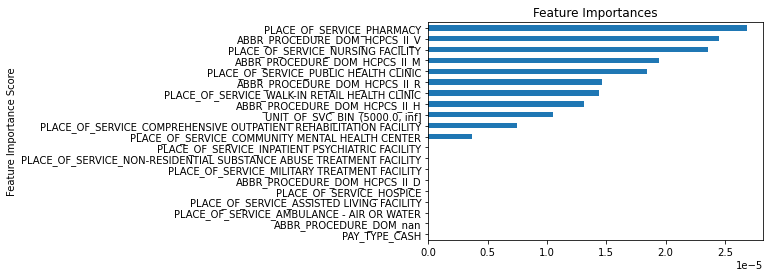

In [49]:
feat_imp = pd.Series(random_forest.feature_importances_, index=train_cols)
feat_imp.sort_values(ascending=True).iloc[:20].plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [50]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test_up, forest_predict_up, target_names=['MBC_PATIENT','NON-MBC_PATIENT']))

In [51]:
# from sklearn.metrics import confusion_matrix
# forest_CM = confusion_matrix(y_test_up, forest_predict_up)

In [52]:
# print(TN,FN,TP,FP)

In [53]:
# print("Accuracy", (forest_CM[1][1]+forest_CM[0][0])/(forest_CM[1][1]+forest_CM[0][0]+forest_CM[0][1]+forest_CM[1][0]))
# print("Sensitivity", forest_CM[1][1]/(forest_CM[1][1]+forest_CM[1][0]))
# print("Specificity", forest_CM[0][0]/(forest_CM[0][0]+forest_CM[0][1]))

In [54]:
# print("Accuracy", (TP+TN)/(TP+TN+FP+FN))

In [55]:
# #Logistic Regression

# LR = LogisticRegression()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(LR, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# LR_fit_time = scores['fit_time'].mean()
# LR_score_time = scores['score_time'].mean()
# LR_accuracy = scores['test_accuracy'].mean()
# LR_precision = scores['test_precision_macro'].mean()
# LR_recall = scores['test_recall_macro'].mean()
# LR_f1 = scores['test_f1_weighted'].mean()
# LR_roc = scores['test_roc_auc'].mean()
# LR.fit(X_train_down[train_cols],y_train_down[target])
# LR_predict_down = LR.predict(X_test_down[train_cols])
# LR_CM = confusion_matrix(y_test_down, LR_predict_down)
# LR_specificity = LR_CM[0][0]/(LR_CM[0][0]+LR_CM[0][1])


# #Decision Tree

# decision_tree = DecisionTreeClassifier()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(decision_tree, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# dtree_fit_time = scores['fit_time'].mean()
# dtree_score_time = scores['score_time'].mean()
# dtree_accuracy = scores['test_accuracy'].mean()
# dtree_precision = scores['test_precision_macro'].mean()
# dtree_recall = scores['test_recall_macro'].mean()
# dtree_f1 = scores['test_f1_weighted'].mean()
# dtree_roc = scores['test_roc_auc'].mean()
# decision_tree.fit(X_train_down[train_cols],y_train_down[target])
# dtree_predict_down = decision_tree.predict(X_test_down[train_cols])
# dtree_CM = confusion_matrix(y_test_down, dtree_predict_down)
# dtree_specificity = dtree_CM[0][0]/(dtree_CM[0][0]+dtree_CM[0][1])


# #Support Vector Machine

# #SVM = SVC(probability = True)
# #scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# #scores = cross_validate(SVM, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
# #sorted(scores.keys())
# #SVM_fit_time = scores['fit_time'].mean()
# #SVM_score_time = scores['score_time'].mean()
# #SVM_accuracy = scores['test_accuracy'].mean()
# #SVM_precision = scores['test_precision_macro'].mean()
# #SVM_recall = scores['test_recall_macro'].mean()
# #SVM_f1 = scores['test_f1_weighted'].mean()
# #SVM_roc = scores['test_roc_auc'].mean()
# #SVM.fit(X_train_down[train_cols],y_train_down[target])
# #SVM_predict_down = SVM.predict(X_test_down[train_cols])
# #SVM_CM = confusion_matrix(y_test_down, SVM_predict_down)
# #SVM_specificity = SVM_CM[0][0]/(SVM_CM[0][0]+SVM_CM[0][1])

# #Linear Discriminant Analysis

# LDA = LinearDiscriminantAnalysis()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(LDA, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# LDA_fit_time = scores['fit_time'].mean()
# LDA_score_time = scores['score_time'].mean()
# LDA_accuracy = scores['test_accuracy'].mean()
# LDA_precision = scores['test_precision_macro'].mean()
# LDA_recall = scores['test_recall_macro'].mean()
# LDA_f1 = scores['test_f1_weighted'].mean()
# LDA_roc = scores['test_roc_auc'].mean()
# LDA.fit(X_train_down[train_cols],y_train_down[target])
# LDA_predict_down = LDA.predict(X_test_down[train_cols])
# LDA_CM = confusion_matrix(y_test_down, LDA_predict_down)
# LDA_specificity = LDA_CM[0][0]/(LDA_CM[0][0]+LDA_CM[0][1])

# #Quadratic Discriminant Analysis

# QDA = QuadraticDiscriminantAnalysis()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(QDA, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# QDA_fit_time = scores['fit_time'].mean()
# QDA_score_time = scores['score_time'].mean()
# QDA_accuracy = scores['test_accuracy'].mean()
# QDA_precision = scores['test_precision_macro'].mean()
# QDA_recall = scores['test_recall_macro'].mean()
# QDA_f1 = scores['test_f1_weighted'].mean()
# QDA_roc = scores['test_roc_auc'].mean()
# QDA.fit(X_train_down[train_cols],y_train_down[target])
# QDA_predict_down = QDA.predict(X_test_down[train_cols])
# QDA_CM = confusion_matrix(y_test_down, QDA_predict_down)
# QDA_specificity = QDA_CM[0][0]/(QDA_CM[0][0]+QDA_CM[0][1])

# #Random Forest Classifier

# random_forest = RandomForestClassifier()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(random_forest, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# forest_fit_time = scores['fit_time'].mean()
# forest_score_time = scores['score_time'].mean()
# forest_accuracy = scores['test_accuracy'].mean()
# forest_precision = scores['test_precision_macro'].mean()
# forest_recall = scores['test_recall_macro'].mean()
# forest_f1 = scores['test_f1_weighted'].mean()
# forest_roc = scores['test_roc_auc'].mean()
# random_forest.fit(X_train_down[train_cols],y_train_down[target])
# forest_predict_down = random_forest.predict(X_test_down[train_cols])
# forest_CM = confusion_matrix(y_test_down, forest_predict_down)
# forest_specificity = forest_CM[0][0]/(forest_CM[0][0]+forest_CM[0][1])

# #K-Nearest Neighbors

# KNN = KNeighborsClassifier()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(KNN, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# KNN_fit_time = scores['fit_time'].mean()
# KNN_score_time = scores['score_time'].mean()
# KNN_accuracy = scores['test_accuracy'].mean()
# KNN_precision = scores['test_precision_macro'].mean()
# KNN_recall = scores['test_recall_macro'].mean()
# KNN_f1 = scores['test_f1_weighted'].mean()
# KNN_roc = scores['test_roc_auc'].mean()
# KNN.fit(X_train_down[train_cols],y_train_down[target])
# KNN_predict_down = KNN.predict(X_test_down[train_cols])
# KNN_CM = confusion_matrix(y_test_down, KNN_predict_down)
# KNN_specificity = KNN_CM[0][0]/(KNN_CM[0][0]+KNN_CM[0][1])

# #Naive Bayes

# scoring
# bayes = GaussianNB()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(bayes, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# bayes_fit_time = scores['fit_time'].mean()
# bayes_score_time = scores['score_time'].mean()
# bayes_accuracy = scores['test_accuracy'].mean()
# bayes_precision = scores['test_precision_macro'].mean()
# bayes_recall = scores['test_recall_macro'].mean()
# bayes_f1 = scores['test_f1_weighted'].mean()
# bayes_roc = scores['test_roc_auc'].mean()
# bayes.fit(X_train_down[train_cols],y_train_down[target])
# bayes_predict_down = bayes.predict(X_test_down[train_cols])
# bayes_CM = confusion_matrix(y_test_down, bayes_predict_down)
# bayes_specificity = bayes_CM[0][0]/(bayes_CM[0][0]+bayes_CM[0][1])


# ## Comparison

# models_tree = pd.DataFrame({
#     'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
#     'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
#     'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
#     'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
#     'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
#     'Recall/Sensitivity' : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
#     'Specificity' : [LR_specificity, dtree_specificity, LDA_specificity, QDA_specificity, forest_specificity, KNN_specificity, bayes_specificity],
#     'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
#     'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
#     }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specificity', 'F1_score', 'AUC_ROC'])
# models_tree.sort_values(by='Accuracy', ascending=False)

In [56]:
# feat_imp = pd.Series(random_forest.feature_importances_, index=train_cols)
# feat_imp.sort_values(ascending=True).iloc[:20].plot(kind='barh', title='Feature Importances')
# plt.ylabel('Feature Importance Score')

In [57]:
# #Logistic Regression

# LR = LogisticRegression()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(LR, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# LR_fit_time = scores['fit_time'].mean()
# LR_score_time = scores['score_time'].mean()
# LR_accuracy = scores['test_accuracy'].mean()
# LR_precision = scores['test_precision_macro'].mean()
# LR_recall = scores['test_recall_macro'].mean()
# LR_f1 = scores['test_f1_weighted'].mean()
# LR_roc = scores['test_roc_auc'].mean()
# LR.fit(X_train[train_cols],y_train[target])
# LR_predict = LR.predict(X_test[train_cols])
# LR_CM = confusion_matrix(y_test, LR_predict)
# LR_specificity = LR_CM[0][0]/(LR_CM[0][0]+LR_CM[0][1])


# #Decision Tree

# decision_tree = DecisionTreeClassifier()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(decision_tree, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# dtree_fit_time = scores['fit_time'].mean()
# dtree_score_time = scores['score_time'].mean()
# dtree_accuracy = scores['test_accuracy'].mean()
# dtree_precision = scores['test_precision_macro'].mean()
# dtree_recall = scores['test_recall_macro'].mean()
# dtree_f1 = scores['test_f1_weighted'].mean()
# dtree_roc = scores['test_roc_auc'].mean()
# decision_tree.fit(X_train[train_cols],y_train[target])
# dtree_predict = decision_tree.predict(X_test[train_cols])
# dtree_CM = confusion_matrix(y_test, dtree_predict)
# dtree_specificity = dtree_CM[0][0]/(dtree_CM[0][0]+dtree_CM[0][1])


# #Support Vector Machine

# #SVM = SVC(probability = True)
# #scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# #scores = cross_validate(SVM, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
# #sorted(scores.keys())
# #SVM_fit_time = scores['fit_time'].mean()
# #SVM_score_time = scores['score_time'].mean()
# #SVM_accuracy = scores['test_accuracy'].mean()
# #SVM_precision = scores['test_precision_macro'].mean()
# #SVM_recall = scores['test_recall_macro'].mean()
# #SVM_f1 = scores['test_f1_weighted'].mean()
# #SVM_roc = scores['test_roc_auc'].mean()
# #SVM.fit(X_train[train_cols],y_train[target])
# #SVM_predict = SVM.predict(X_test[train_cols])
# #SVM_CM = confusion_matrix(y_test, SVM_predict)
# #SVM_specificity = SVM_CM[0][0]/(SVM_CM[0][0]+SVM_CM[0][1])

# #Linear Discriminant Analysis

# LDA = LinearDiscriminantAnalysis()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(LDA, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# LDA_fit_time = scores['fit_time'].mean()
# LDA_score_time = scores['score_time'].mean()
# LDA_accuracy = scores['test_accuracy'].mean()
# LDA_precision = scores['test_precision_macro'].mean()
# LDA_recall = scores['test_recall_macro'].mean()
# LDA_f1 = scores['test_f1_weighted'].mean()
# LDA_roc = scores['test_roc_auc'].mean()
# LDA.fit(X_train[train_cols],y_train[target])
# LDA_predict = LDA.predict(X_test[train_cols])
# LDA_CM = confusion_matrix(y_test, LDA_predict)
# LDA_specificity = LDA_CM[0][0]/(LDA_CM[0][0]+LDA_CM[0][1])

# #Quadratic Discriminant Analysis

# QDA = QuadraticDiscriminantAnalysis()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(QDA, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# QDA_fit_time = scores['fit_time'].mean()
# QDA_score_time = scores['score_time'].mean()
# QDA_accuracy = scores['test_accuracy'].mean()
# QDA_precision = scores['test_precision_macro'].mean()
# QDA_recall = scores['test_recall_macro'].mean()
# QDA_f1 = scores['test_f1_weighted'].mean()
# QDA_roc = scores['test_roc_auc'].mean()
# QDA.fit(X_train[train_cols],y_train[target])
# QDA_predict = QDA.predict(X_test[train_cols])
# QDA_CM = confusion_matrix(y_test, QDA_predict)
# QDA_specificity = QDA_CM[0][0]/(QDA_CM[0][0]+QDA_CM[0][1])

# #Random Forest Classifier

# random_forest = RandomForestClassifier()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(random_forest, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# forest_fit_time = scores['fit_time'].mean()
# forest_score_time = scores['score_time'].mean()
# forest_accuracy = scores['test_accuracy'].mean()
# forest_precision = scores['test_precision_macro'].mean()
# forest_recall = scores['test_recall_macro'].mean()
# forest_f1 = scores['test_f1_weighted'].mean()
# forest_roc = scores['test_roc_auc'].mean()
# random_forest.fit(X_train[train_cols],y_train[target])
# forest_predict = random_forest.predict(X_test[train_cols])
# forest_CM = confusion_matrix(y_test, forest_predict)
# forest_specificity = forest_CM[0][0]/(forest_CM[0][0]+forest_CM[0][1])

# #K-Nearest Neighbors

# KNN = KNeighborsClassifier()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(KNN, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# KNN_fit_time = scores['fit_time'].mean()
# KNN_score_time = scores['score_time'].mean()
# KNN_accuracy = scores['test_accuracy'].mean()
# KNN_precision = scores['test_precision_macro'].mean()
# KNN_recall = scores['test_recall_macro'].mean()
# KNN_f1 = scores['test_f1_weighted'].mean()
# KNN_roc = scores['test_roc_auc'].mean()
# KNN.fit(X_train[train_cols],y_train[target])
# KNN_predict = KNN.predict(X_test[train_cols])
# KNN_CM = confusion_matrix(y_test, KNN_predict)
# KNN_specificity = KNN_CM[0][0]/(KNN_CM[0][0]+KNN_CM[0][1])

# #Naive Bayes

# scoring
# bayes = GaussianNB()
# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(bayes, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
# sorted(scores.keys())
# bayes_fit_time = scores['fit_time'].mean()
# bayes_score_time = scores['score_time'].mean()
# bayes_accuracy = scores['test_accuracy'].mean()
# bayes_precision = scores['test_precision_macro'].mean()
# bayes_recall = scores['test_recall_macro'].mean()
# bayes_f1 = scores['test_f1_weighted'].mean()
# bayes_roc = scores['test_roc_auc'].mean()
# bayes.fit(X_train[train_cols],y_train[target])
# bayes_predict = bayes.predict(X_test[train_cols])
# bayes_CM = confusion_matrix(y_test, bayes_predict)
# bayes_specificity = bayes_CM[0][0]/(bayes_CM[0][0]+bayes_CM[0][1])


# ## Comparison

# models_tree = pd.DataFrame({
#     'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
#     'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
#     'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
#     'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
#     'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
#     'Recall/Sensitivity'      : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
#     'Specifivity' : [LR_specificity, dtree_specificity, LDA_specificity, QDA_specificity, forest_specificity, KNN_specificity, bayes_specificity],
#     'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
#     'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
#     }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specifivity', 'F1_score', 'AUC_ROC'])
# models_tree.sort_values(by='Accuracy', ascending=False)

In [58]:
# feat_imp = pd.Series(random_forest.feature_importances_, index=train_cols)
# feat_imp.sort_values(ascending=True).iloc[:20].plot(kind='barh', title='Feature Importances')
# plt.ylabel('Feature Importance Score')

In [59]:
# make_submission(LR_predict_dummy_down,"LR_predict_dummy_down")
# make_submission(dtree_predict_dummy_down,"dtree_predict_dummy_down")
# make_submission(LDA_predict_dummy_down,"LDA_predict_dummy_down")
# make_submission(QDA_predict_dummy_down,"QDA_predict_dummy_down")
# make_submission(forest_predict_dummy_down,"forest_predict_dummy_down")
# make_submission(KNN_predict_dummy_down,"KNN_predict_dummy_down")
# make_submission(bayes_predict_dummy_down,"bayes_predict_dummy_down")

In [60]:
# models_tree = pd.DataFrame({
#     'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
#     'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
#     'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
#     'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
#     'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
#     'Recall/Sensitivity'      : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
#     'Specifivity' : [LR_specificity, dtree_specificity, LDA_specificity, QDA_specificity, forest_specificity, KNN_specificity, bayes_specificity],
#     'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
#     'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
#     }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specifivity', 'F1_score', 'AUC_ROC'])
# models_tree.sort_values(by='Accuracy', ascending=False)